In [1]:
# -*- coding: utf-8 -*-
#!/home/seva/anaconda3/envs/cirenv/bin/python python3
print('hello')
import numpy as np
import torch as t

import torch.nn as nn
import torch.nn.functional as F
import random as rnd
import math
#import cv2
import time
%load_ext autoreload
%autoreload 2
import importlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#import pandas as pd 

hello


## Code for enable automatically scroll down

In [2]:
# %%javascript

# #<script type="text/javascript" src="http://code.jquery.com/jquery-1.7.1.min.js"></script>
# window.scroll_flag = true
# window.scroll_exit = false
# window.scroll_delay = 100

# $(".output_scroll").each(function() {
#     $(this)[0].scrollTop = $(this)[0].scrollHeight;
# });

# function callScrollToBottom() {
#     setTimeout(scrollToBottom, window.scroll_delay);
# }

# function scrollToBottom() {
#     if (window.scroll_exit) {
#         return;
#     }
#     if (!window.scroll_flag) {
#         callScrollToBottom();
#         return;
#     };

#     $(".output_scroll").each(function() {
#         if (!$(this).attr('scroll_checkbox')){
#             window.scroll_flag = true;
#             $(this).attr('scroll_checkbox',true);
#             var div = document.createElement('div');
#             var checkbox = document.createElement('input');
#             checkbox.type = "checkbox";
#             checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
#             checkbox.checked = "checked"
#             div.append("Auto-Scroll-To-Bottom: ");
#             div.append(checkbox);
#             $(this).parent().before(div);
#         }

#         $(this)[0].scrollTop = $(this)[0].scrollHeight;
#     });
#     callScrollToBottom();
# }
# scrollToBottom();

In [3]:
#%aimport architecture
%aimport genbatch
%aimport circle_generator

In [4]:
np.random.seed(0)
t.manual_seed(0)
rnd.seed(0)
t.backends.cudnn.deterministic=True

# Random data generation

In [5]:
#x = t.tensor(np.random.uniform(low = 0, high = 1.0, size = [b, 1, imsize, imsize])).float()
#print(x.shape)

# Generation of images

In [6]:
%run -i genbatch

In [7]:
np.random.seed(0)
t.random.manual_seed(0)

In [8]:
lossla = []
losscount = 0
#N = 100 #number of images in a batch
#n = 1 #number of figures for multiple objects 
#from genc import genc
from genbatch import genbatch
#importlib.reload(gen)
# figure_type = 'circle'
# if figure_type == 'circle':
#     k = 3
# elif figure_type == 'ellipse':
#     k = 4
k = 4
imsize = 100
dataset, _ = genbatch(k, imsize, N = 10000, n = 1)

In [9]:
print(dataset[1][0]) #second counter is a batch counter (one out of N), 
#first is data counter (validation image, train image, validation label, train label)
#third is color channel, for grayscale it is just single dimension 

tensor([[[9.2914e-04, 1.2028e-03, 1.5559e-03,  ..., 3.0768e-06,
          2.3536e-06, 1.8000e-06],
         [9.5467e-04, 1.2367e-03, 1.6007e-03,  ..., 3.1322e-06,
          2.3953e-06, 1.8314e-06],
         [9.8037e-04, 1.2708e-03, 1.6460e-03,  ..., 3.1873e-06,
          2.4368e-06, 1.8626e-06],
         ...,
         [7.9427e-04, 1.0244e-03, 1.3200e-03,  ..., 2.7739e-06,
          2.1253e-06, 1.6280e-06],
         [7.7045e-04, 9.9300e-04, 1.2785e-03,  ..., 2.7183e-06,
          2.0834e-06, 1.5964e-06],
         [7.4697e-04, 9.6205e-04, 1.2377e-03,  ..., 2.6630e-06,
          2.0416e-06, 1.5648e-06]]], grad_fn=<SelectBackward>)


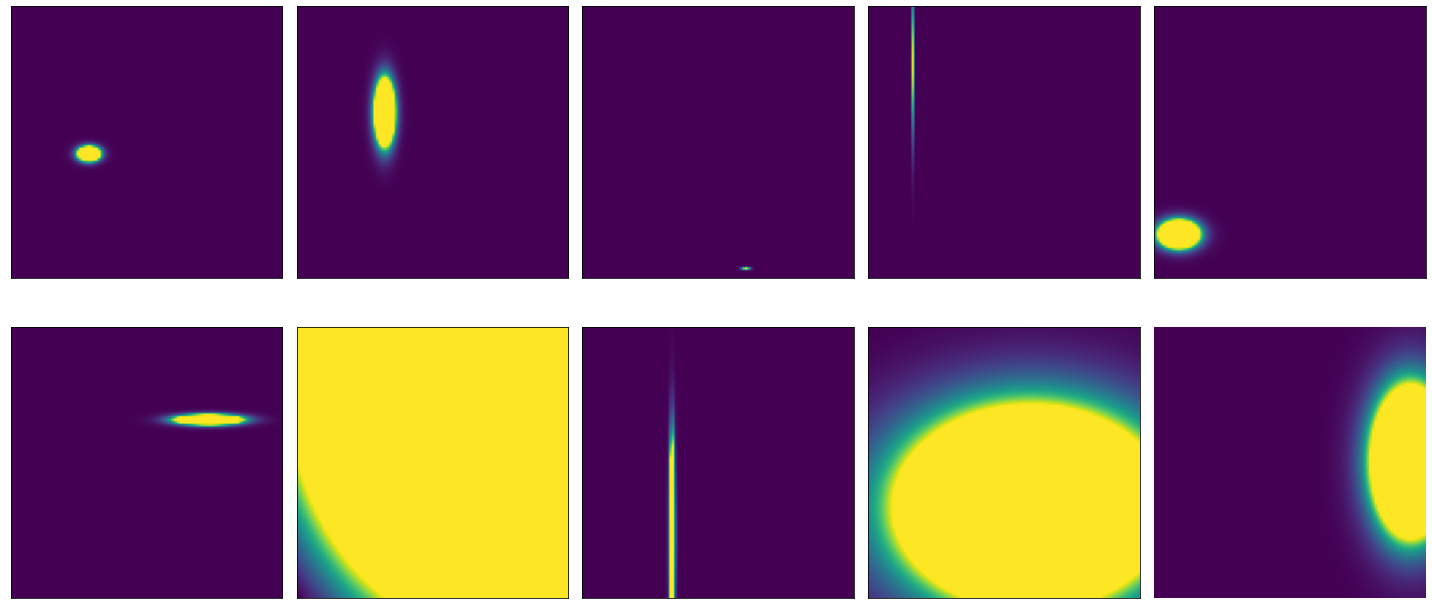

In [10]:
#print(np.squeeze(dataset[0][0].detach().numpy()).size)
plt.rcParams["figure.figsize"] = (20,10)

#array = np.random.rand(100,100)
#array[array <= 0.2] = 0
#array = dataset[0][0][0].detach().numpy()
#result = (array < 0.2) * array
array = dataset[0][3][0].detach().numpy()
# nrows=4
# ncols=4
nrows=2 
ncols=5
figure, ax = plt.subplots(nrows, ncols)
# imsize = 200
# x = range(imsize)
# y = range(imsize)
for i in range(nrows*ncols): 
   # print(np.unravel_index(i, (2,2)))
    axe = ax[np.unravel_index(i, (nrows,ncols))]
    axe.imshow(dataset[0][i+10][0].detach().numpy())  
    axe.set_xticks([])
    axe.set_yticks([])
    #axe.set_yticks([])
    #axarr[i, j].axis('off')

# ax[0, 1].imshow(array)
# ax[1, 0].imshow(array)
# ax[1, 1].imshow(array)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # only needed for matplotlib < 3.1
# fig.colorbar(sm)
# plt.xticks(" ")
# plt.yticks(" ")
plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
figure.tight_layout()
# for axe in ax:
#     axe.set_xticks([])
#     axe.set_yticks([])

#plt.show()
#plt.savefig('plot')
#plt.clf()



# for i in range(10):
#     array = dataset[0][i][0].detach().numpy()
#     plt.imshow(array)
# k = array.flatten()
# print(k)

In [11]:
#%run -i architecture

# Network architectures 

In [12]:
class DNet(t.nn.Module):
    def __init__(self, C_in, D_out, imsize, layers, dop):
        #super(DNet, self).__init__()
        super().__init__()
        self.linear1 = t.nn.Linear(imsize*imsize*C_in, layers[0])
        self.linear2 = t.nn.Linear(layers[0],layers[1])
        self.linear3 = t.nn.Linear(layers[1],layers[2])
        self.linear4 = t.nn.Linear(layers[2], D_out)
        self.do = t.nn.Dropout(p=dop)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        #print(x.shape)
        x = self.do(F.leaky_relu(self.linear1(x).clamp(min=0)))
        #print(x.shape)
        x = self.do(F.leaky_relu(self.linear2(x)))
        #print(x.shape)
        #print(t.mean(x))
        x = self.do(F.relu(self.linear3(x)))
        #x = F.relu(self.linear4(x))
        x = self.do(self.linear4(x))
        return x
# class DNet(t.nn.Module):
#     def __init__(self, C_in, D_out, imsize):
#         #super(DNet, self).__init__()
#         super().__init__()
#         self.linear1 = t.nn.Linear(imsize*imsize*C_in, 1000)
#         self.linear2 = t.nn.Linear(1000,500)
#         self.linear3 = t.nn.Linear(500,100)
#         self.linear4 = t.nn.Linear(100, D_out)
#         self.do = t.nn.Dropout(p=0.5)

#     def forward(self, x):
#         x = x.view(x.shape[0], -1)
#         #print(x.shape)
#         x = self.do(F.leaky_relu(self.linear1(x).clamp(min=0)))
#         #print(x.shape)
#         x = self.do(F.leaky_relu(self.linear2(x)))
#         #print(x.shape)
#         #print(t.mean(x))
#         x = self.do(F.relu(self.linear3(x)))
#         #x = F.relu(self.linear4(x))
#         x = self.do(self.linear4(x))
#         return x
class CNet(t.nn.Module):
    def __init__(self, C_in, D_out):
        super(CNet, self).__init__()
        self.conv0 = nn.Conv2d(C_in, 6, 5)
        self.conv1 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.linear0 = t.nn.Linear(16*47*47, 1000)
        self.linear1 = t.nn.Linear(1000, D_out)

    def forward(self, x):
        x = self.pool(F.relu(self.conv0(x)))
        print(t.mean(x))
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, x.size(1)*x.size(2)*x.size(3))
        x = F.relu(self.linear0(x))
        x = F.relu(self.linear1(x))
        #x = self.linear1(x)
        return x

In [13]:
nnarchitectures = { 'DNet' : DNet, 
                    'CNet' : CNet}

In [14]:
def ntime(fseconds):
    #millis = int(millis)
    seconds=(fseconds)%60
    seconds = int(seconds)
    minutes=(fseconds/(60))%60
    minutes = int(minutes)
    hours=(fseconds/(60*60))%24

    print ("%d:%d:%d" % (hours, minutes, seconds))

In [15]:
#print(dataset[3][0].shape)
#dataset[3].shape[1]

In [16]:
%aimport circle_generator
from circle_generator import *

# Network training diagnostics

In [17]:
def train(dataset, lr, epochs, layers, dop, imsize, model = None, modelname = 'DNet', ltype = 'supervised') :
    xtrain = dataset[0] #first counter is batch counter, second is data counter
    xval = dataset[1]
    ytrain = dataset[2]
    yval = dataset[3]
    op = dataset[3].shape[1] #output parameters
    N = dataset[0].shape[0] #batch size
    if model is None:
            #def __init__(self, C_in, D_out, imsize, layers, dop):
        model = nnarchitectures[modelname](1, op, imsize, layers, dop)
    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the 
    # modules which are members of the model.
    criterion = t.nn.MSELoss(reduction='mean')
    #criterion = t.nn.L1Loss()
    optimizer = t.optim.Adam(model.parameters(), lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    #optimizer = t.optim.Adam(model.parameters(), lr)
    #loss, losst, lossv = ([] for i in range(3))
    loss = []
    lossa = np.zeros([2, epochs])
    #tl = []
    for tm in range(epochs):
        #start = time.time()
        xtrain = xtrain.detach() #xtrain contains images of the circle
        y_pred = model(xtrain) #y_pred consists of coordinates of the circle center and its radius
        if ltype == 'supervised': 
            # Forward pass: Compute predicted y by passing x to the model
            #calculating loss between predicted parameters and parameters which were used for generation
        
            loss = criterion(y_pred, ytrain)
            lossa[0][tm] = loss.item() #the first number in the loss is a training loss
            #updating list with losses 
            # Zero gradients, perform a backward pass, and update the weights.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            lossa[1][tm] = criterion(model(xval), yval).item() #the second number in the loss is a validation loss 
        else: 
            x_pred = t.zeros([N,1,imsize,imsize])
            for i in range(N):
                # Generating circles with inferred parameters y_pred.
                #print(y_pred)
                x_pred[i,0,:,:] = ellipses(y_pred, k, imsize)
            # Compute and print loss
            # Compare generated image with the input image, finding per-pixel distance between two images
            loss = criterion(x_pred, xtrain)
            #print(loss.item())
            lossa[0][tm] = loss.item() #the first number in the loss is a training loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            lossa[1][tm] = criterion(model(xval), yval).item() #the second number in the loss is a validation loss 
        #end = time.time()
        #tl.append(end-start)
        #if tm % 10 == 9:
        #ntime(sum(tl) / len(tl)*epochs - sum(tl))
    return model, lossa
#wefwef

## Run the training with the different learning rate 

In [19]:
#%run -i architecture
#lrrange = np.linspace(2.5e-5, 7.5e-5, 3) #test different learning rates (min, max, number of points)
lrrange = np.linspace(5e-5, 5e-5, 1) #test different learning rates (min, max, number of points)
epochs = 20
#imsize = 100
lossl = np.zeros([len(lrrange), 2, epochs])
for i, lr in enumerate(lrrange):
    model = None
    _, lossa = train(dataset, lr, epochs, imsize, ltype = 'supervised')
    #ntime(len(lrrange)*sum(tl) / len(tl)*epochs - sum(tl))
    lossl[i] = lossa

TypeError: train() missing 2 required positional arguments: 'dop' and 'imsize'

### Model test

In [18]:
# print(model(testset[0]))
# loss = criterion(model(testset[0]), testset[1])
# print(loss.item()/(N-b))

### Plotting the loss in dependence on epoch

NameError: name 'lossl' is not defined

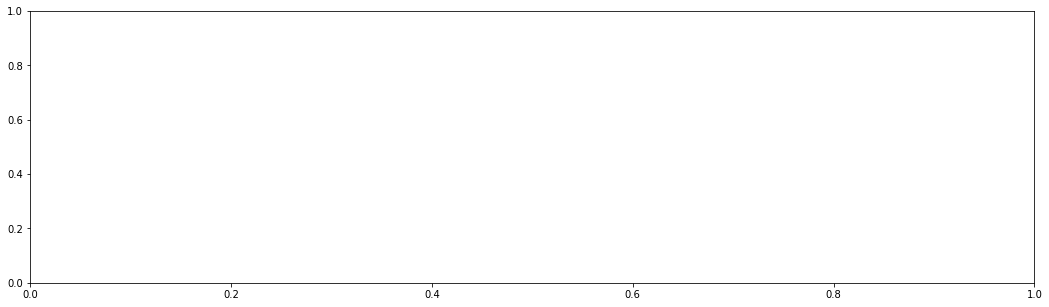

In [19]:
plt.rcParams["figure.figsize"] = (18,5)
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
colors = ['red', 'green']
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,10000])
labels_text = ['training', 'validation']
for par in range(len(lossl)):
    for trt in range(2):
        plt.plot(np.arange(epochs), lossl[par][trt][:], label=labels_text[trt], \
                 color = colors[trt], linestyle = linestyles[par], linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0., fontsize = 24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#axes.legend([1, 2, 3], ("0-10", "10-100"))
plt.autoscale(enable=True, axis='both', tight=None)
# font = fm.FontProperties(#family='Comic Sans MS',
#                                    #weight='bold',
#                                    style='normal', size=24)
# axes.legend(prop=font)
#ax.set_ylabel('Example', fontsize=40)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('MSE Loss', fontsize=24)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()

In [ ]:
print(lossa[0][1])

### Detecting a training line with a minimal validation loss trend and calculating corresponing lr

In [20]:
import operator
losval = np.array(losslv)
#print(np.amin(losval, axis=0)) 
result = np.where(losval == np.amin(losval, axis=0))
#print('Tuple of arrays returned : ', result)
#print('List of coordinates of minimum value in Numpy array : ')
# zip the 2 arrays to get the exact coordinates
listOfCordinates = list(zip(result[0], result[1]))
# travese over the list of cordinates
d = dict()
for cord in listOfCordinates:
    #print(cord)
    c = cord[0]
    d[c] = d.get(c,0) + 1
#print(d)
print(max(d.items(), key=operator.itemgetter(1))[0])
print("{:.2e}".format(lrrange[int(max(d.items(), key=operator.itemgetter(1))[0])]))


NameError: name 'losslv' is not defined

## Optimizing data size 

In [21]:
epochs = 50
lr = 5e-5
imgsize = 200
bn = 10
bs = 1000 
k = 3
n = 1
layers = [1000, 500, 50]
dop = 0

In [22]:
lossl = np.zeros([2, 1])
lossl = np.delete(lossl, 0, 1)
modeli = None
tl = []

In [81]:
#drange = np.linspace(1e+4, 1e+4, 4, dtype = int)
starta = time.time()
for i in range(bn):
    start = time.time()
    #print(i)
    #idata, _ = genbatch(int(1e+3), n, 'one_circle_gen', imsize)
    #print(i)
    idata, _ = genbatch(k, imsize, bs, n)
    #def train(dataset, lr, epochs, layers, dop, imsize, model = None, modelname = 'DNet', ltype = 'supervised') :
    modeli, lossc = train(idata, lr, epochs, layers, dop, imsize = imgsize, modelname = 'DNet',  model = modeli)
    #lossl.append(lossa)
    lossl = np.concatenate((lossl, lossc), axis=1)
    #print(lossl.shape[1])
    end = time.time()
    tl.append(end-start)
#lossl = np.delete(lossl, 0, 1)
    #start = time.time()
#     tl.append(end-start)
    ntime(sum(tl) / len(tl)*bn - sum(tl))
enda = time.time()
timelapse = enda - starta

RuntimeError: size mismatch, m1: [640 x 10000], m2: [40000 x 1000] at ..\aten\src\TH/generic/THTensorMath.cpp:41

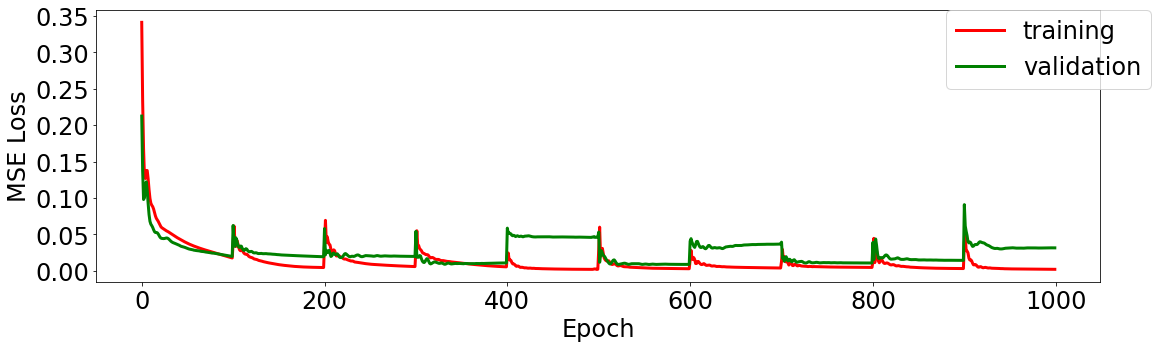

In [78]:
plt.rcParams["figure.figsize"] = (18,5)
#linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
colors = ['red', 'green']
axes = plt.gca()
labels_text = ['training', 'validation']
for trt in range(len(labels_text)):
    plt.plot(np.arange(epochs*bn), lossl[trt][:], label=labels_text[trt], \
             color = colors[trt], linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0., fontsize = 24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.autoscale(enable=True, axis='both', tight=None)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('MSE Loss', fontsize=24)
#+n+bn+bs+epochs+lr+imgsize+layers+dop+
plt.savefig('k'+str(k)+';'+'n'+str(n)+';'+'imgsize'+str(imgsize)+','+'bn'+str(bn)+','+'bs'+str(bs)+','+\
            'epochs'+str(epochs)+','+'layers'+str(layers)+','+'lr'+str(lr)+','+'etime'+str(int(timelapse))+'.png', bbox_inches='tight')
plt.show()

# GPU enabling

In [25]:
t.cuda.is_available()
t.device('cuda') 

device(type='cuda')

# Unsupervised model. NN infers parameters of a object, then conducts it to the image generator and calculate loss between generated image and input image

In [ ]:
%run -i 'architecture.py'
# Choose NN model architecture, criterion for loss calculation and optimizer
model = CNet(1, ytrain.shape[1])
#criterion = t.nn.MSELoss(reduction='sum')
criterion = t.nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(), lr=1e-5)
from circle_generator import *
lossl = []
for t in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    xtrain = xtrain.detach() #xtrain is an image with a single circle with smooth edges
    y_pred = model(xtrain) #y_pred contains coordiantes of circle centre and its radius
    x_pred = t.zeros([b,1,imsize,imsize])
    for i in range(b):
        # Generating circles with inferred parameters y_pred.
        x_pred[i,0,:,:] = one_circle_gen(y_pred[i])
    # Compute and print loss
    # Compare generated image with the input image, finding per-pixel distance between two images
    loss = criterion(x_pred, xtrain)
    lossl.append(loss.item())
    #print(y_pred[0])
    #print(y_pred.grad_fn)
    #print(t.sum((x_pred - xtrain)))
    #print(t.sum(y_pred))


    # Print loss every 10 epochs
    print(y_pred[0])
    if t % 10 == 9:
        print(t, loss.item())
        #print(y_pred[0])
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
y_pred[0]

In [ ]:
plt.imshow(x_pred[0,0,:,:].detach().numpy())

In [ ]:
print(y_pred)

In [ ]:
plt.imshow(xtrain[9,0,:,:].detach().numpy())

In [ ]:
plt.imshow((x_pred - xtrain)[30,0,:,:].detach().numpy())

In [ ]:
t.sum((x_pred - xtrain))

In [ ]:
t.sum((x_pred))

In [ ]:
criterion(x_pred[i,0,:,:], xtrain[i,0,:,:])

In [ ]:
print(y_pred)

In [ ]:
a = t.tensor([1, 2, 3])
b = t.tensor([4, 5, 6])
x = t.cat((a, b), 0)
print(x)